# Проект- Разведовательный анализ данных

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

Данные представляют собой параметры, характеризующие условия жизни учеников. Описание переменных в датасет из задания:
1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике


Задачи проекта:

1. Первичная обработка данных
2. Первичный анализ данных в столбцах
3. Преобразование данных
4. Корреляционный анализ
5. Подготовка выводов

Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

# считываем исходный датасет
stud = pd.read_csv('stud_math.xls')

# Первоначальный осмотр данных

In [2]:
display(stud.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
print(
    f'В данном наборе данных {stud.shape[0]} строк и {stud.shape[1]} столбцов.')
print(f'В {stud.isnull().any().sum()} столбцах имеются пропущенные значения.')

В данном наборе данных 395 строк и 30 столбцов.
В 27 столбцах имеются пропущенные значения.


In [5]:
one_value_cols = [col for col in stud.columns if stud[col].nunique() <= 1]
print(f'{len(one_value_cols)} столбцов содержат только одно уникальное значение.')

0 столбцов содержат только одно уникальное значение.


In [6]:
two_value_cols = [col for col in stud.columns if stud[col].nunique() <= 2]
print(f'{len(two_value_cols)} столбцов содержат только два уникальных значения.')

13 столбцов содержат только два уникальных значения.


In [7]:
# Посмотрим, какие столбцы содержать только 2 уникальных значения:
display(two_value_cols)

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Промежуточные выводы:
* Из датасет загрузилось 30 столбцов, а в описании даны 29 столбцов. Добавлен столбец "Studytime, granular". 
* Всего в датасете 395 записей
* Столбцов только с одним уникальным значением в датасете не имеется.
* Столбцов с 2 уникальными значениями в датасете - 13.

# Анализ данных в стоблцах

Для удобства дальнейшего анализа переименуем столбцы:

In [8]:
# Как дано в датасете:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [9]:
# Переименовываем некоторые столбцы следующим образом:
stud.rename(columns={'Pstatus': 'p_status', 'Medu': 'm_edu', 'Fedu': 'f_edu', 'Mjob': 'm_job',
                     'Fjob': 'f_job', 'studytime, granular': 'studytime_gr', 'goout': 'go_out',
                     'schoolsup': 'school_sup', 'famsup': 'fam_sup'}, inplace=True)

In [10]:
# проверим, что все правильно:
display(stud.head(5))

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,...,studytime_gr,higher,internet,romantic,famrel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## 1. Посмотрим по каким школам ('school') приведены данные в нашем датасете

Сначала создадим функцию для быстрого получения информации по столбцу:

In [11]:
def col_overview(x):
    print('Количество пропусков: {},'.format(x.isnull().sum()))
    print('{},'.format(x.describe()))
    print('Распределение:\n{},'.format(x.value_counts()))
    x.hist()

Количество пропусков: 0,
count     395
unique      2
top        GP
freq      349
Name: school, dtype: object,
Распределение:
GP    349
MS     46
Name: school, dtype: int64,


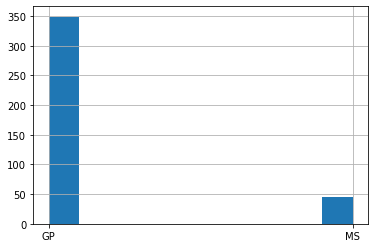

In [12]:
col_overview(stud.school)

В файле приведены данные только по ученикам из двух школ. Пропущенных данных нет. Учеников из школы GP в 7.6 раз больше чем учеников из школы MS

## 2. Посмотрим пол учащихся по столбцу 'sex' 
('F' - женский, 'M' - мужской)

Количество пропусков: 0,
count     395
unique      2
top         F
freq      208
Name: sex, dtype: object,
Распределение:
F    208
M    187
Name: sex, dtype: int64,


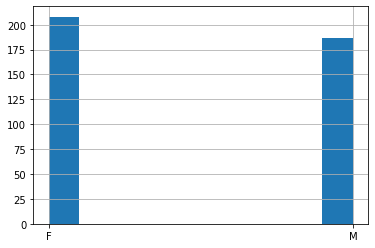

In [13]:
col_overview(stud.sex)

*Количество девочек больше чем количество мальчиков в этом датафрейме. Пропущенных данных нет.*

## 3. Посмотрим теперь как распределен возраст учащихся по столбцу 'age' 
(Возраст от 15 до 22 лет включительно)

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

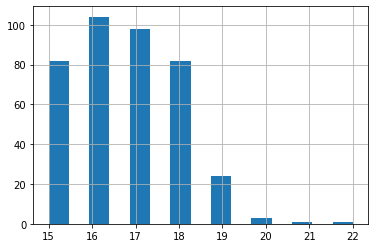

In [14]:
stud.age.hist(bins=15)
stud.age.describe()

*Большинство данных по возрасту учащихся приходится на 16 лет. Средний возраст учащихся - 17 лет. Распределение -положительно смещенное. В данных есть выбросы*

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


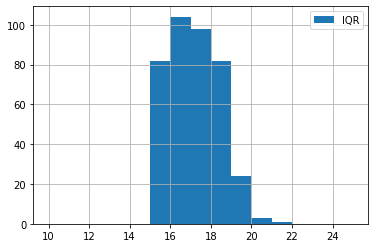

In [15]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.loc[stud.age.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=15, range=(10, 25), label='IQR')
plt.legend()

*Отфилтровываем данные и убираем выбросы:*

In [16]:
stud.loc[stud['age'] == 22.0, 'age'] = np.nan

In [17]:
# Посмотрим как это отразилось на распределении:
stud.age.describe()

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

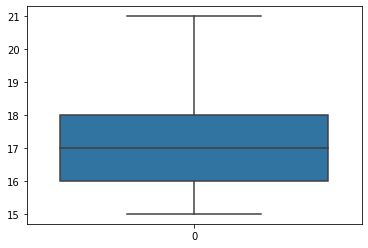

In [18]:
# построим boxplote, чтобы убедится что выбросов нет
sns.boxplot(data=stud.age)

In [19]:
# А теперь посмотрим как распределены оценки в зависимости от возраста учащихся:
display(pd.DataFrame(stud.groupby(['age']).score.agg(
    ['count', 'mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15.0,82,56.280488,95.0,0.0,55.0
16.0,103,55.194175,100.0,0.0,55.0
17.0,98,51.377551,90.0,0.0,55.0
18.0,80,48.312500,95.0,0.0,50.0
19.0,21,40.238095,65.0,0.0,45.0
20.0,3,70.000000,90.0,45.0,75.0
21.0,1,35.000000,35.0,35.0,35.0


Помежуточные выводы:
* Самое большое количество учеников приходится на 16-17 лет
* Чем старше ученик - тем хуже оценки (за исключением данных по 20 летним). Но надо эту гипотезу детально рассмотреть во время определения степени корреляции между этими параметрами.

## 4. Посмотрим данные по месту проживания учащихся ('address')
('U' - городской, 'R' - за городом)

Количество пропусков: 17,
count     378
unique      2
top         U
freq      295
Name: address, dtype: object,
Распределение:
U    295
R     83
Name: address, dtype: int64,


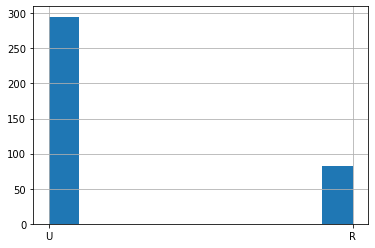

In [20]:
col_overview(stud.address)

Промежуточные выводы:
* Городских учеников больше чем загородних
* В столбце есть 17 пропущенных значений. Удалять их, считаю, нецелесообразным, так как тем самым можем удалить содержательные по остальным параметрам записи. Но заменить на доминирующее в датасет значение, считаю, можно:

In [21]:
stud.address = stud.address.apply(lambda x: 'U' if pd.isnull(x) else 'U' if x == 'nan'
                                  else x)

Количество пропусков: 0,
count     395
unique      2
top         U
freq      312
Name: address, dtype: object,
Распределение:
U    312
R     83
Name: address, dtype: int64,


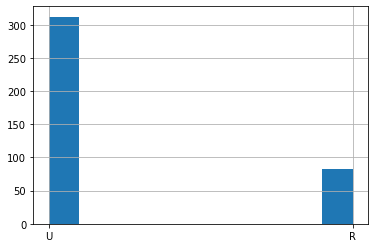

In [22]:
col_overview(stud.address)

## 5. В столбце 'famsize' представлены данные по размеру семьи
('LE3' <= 3, 'GT3' >3)

Количество пропусков: 27,
count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object,
Распределение:
GT3    261
LE3    107
Name: famsize, dtype: int64,


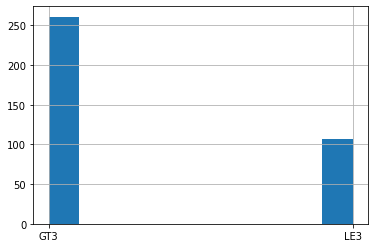

In [23]:
# Посмотрим как представлены данные по этому столбцу:
col_overview(stud.famsize)

Предварительные выводы:
1. В датасете больше учащихся из семьи более 3 человек 
2. В данных есть пропуски.Удалять их, считаю, нецелесообразным, так как тем самым можем удалить содержательные по остальным параметрам записи. Но заменить на доминирующее в датасет значение, считаю, можно:

In [24]:
stud.famsize = stud.famsize.apply(lambda x: 'GT3' if pd.isnull(x) else 'GT3' if x == 'nan'
                                  else x)

Количество пропусков: 0,
count     395
unique      2
top       GT3
freq      288
Name: famsize, dtype: object,
Распределение:
GT3    288
LE3    107
Name: famsize, dtype: int64,


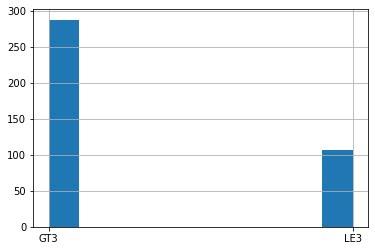

In [25]:
col_overview(stud.famsize)

## 6. Посмотрим теперь на статус совместного житья родителей (p_status)
('T' - живут вместе 'A' - раздельно)

Количество пропусков: 45,
count     350
unique      2
top         T
freq      314
Name: p_status, dtype: object,
Распределение:
T    314
A     36
Name: p_status, dtype: int64,


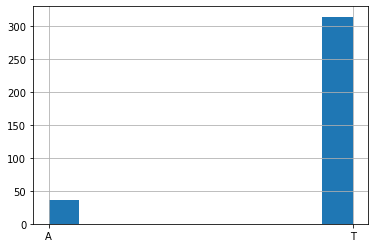

In [26]:
# Посмотрим как представлены данные по этому столбцу:
col_overview(stud.p_status)

Промежуточные выводы:
1. У большинства учащихся родители живут вместе. 
2. В данных есть пропуски.Удалять их, считаю, нецелесообразным, так как тем самым можем удалить содержательные по остальным параметрам записи. Но заменить на доминирующее в датасет значение, считаю, можно:

In [27]:
stud.p_status = stud.p_status.apply(lambda x: 'T' if pd.isnull(x) else 'T' if x == 'nan'
                                    else x)

Количество пропусков: 0,
count     395
unique      2
top         T
freq      359
Name: p_status, dtype: object,
Распределение:
T    359
A     36
Name: p_status, dtype: int64,


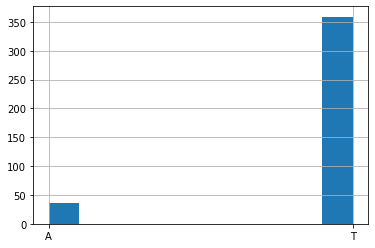

In [28]:
col_overview(stud.p_status)

## 7. Посмотрим теперь на образование родителей в столбцах m_edu и f_edu 
(0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Количество пропусков: 3,
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64,
Распределение:
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: m_edu, dtype: int64,


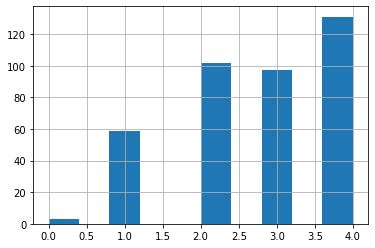

In [29]:
# Сначала посмотрим на образование матерей учащихся:
col_overview(stud.m_edu)

    В данных есть пропуски, но немного, всего 3. Около одной трети матерей имеют высшее образование. 

Количество пропусков: 24,
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64,
Распределение:
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: f_edu, dtype: int64,


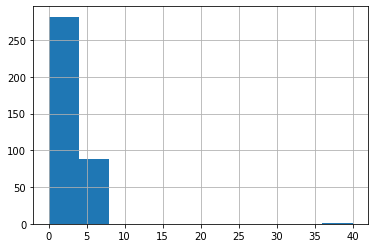

In [30]:
# А теперь посмотрим на образование отцов учащихся:
col_overview(stud.f_edu)

По данному столбцу пропусков намного больше, отсутствуют записи по 24 строкам. Также видим явную ошибку ввода. Вместо '4', указали значение '40'.

In [31]:
# Заменим ошибочно введенное значение:
stud['f_edu'] = stud['f_edu'].replace([40.0], 4.0)

Количество пропусков: 24,
count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64,
Распределение:
2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: f_edu, dtype: int64,


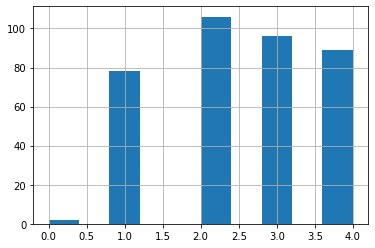

In [32]:
# Посмотрим график заново:
col_overview(stud.f_edu)

Построим также диаграмму "ящик с усами" чтобы посмотреть разброс по этим двум параметрам:

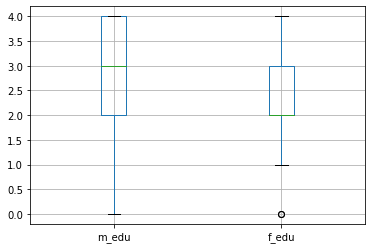

In [33]:
stud.boxplot(column=['m_edu', 'f_edu'])

## 8. Теперь посмотрим на информацию по работе родителей 
('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

### Работа матери: m_job

Количество пропусков: 19,
count       376
unique        5
top       other
freq        133
Name: m_job, dtype: object,
Распределение:
other       133
services     98
at_home      58
teacher      55
health       32
Name: m_job, dtype: int64,


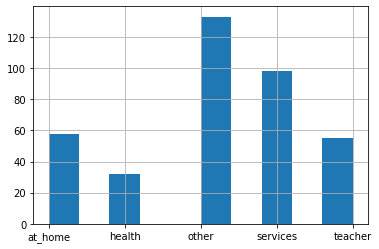

In [34]:
col_overview(stud.m_job)

### Работа отца: f_job

Количество пропусков: 36,
count       359
unique        5
top       other
freq        197
Name: f_job, dtype: object,
Распределение:
other       197
services    102
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64,


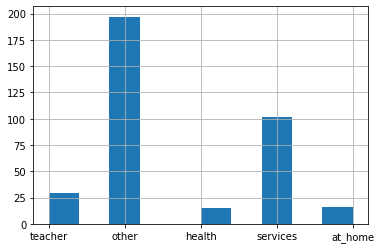

In [35]:
col_overview(stud.f_job)

Промежуточные выводы:
1. В столбце с данными по работе матери есть 19 пропусков, в то время как по отцам -36. Так как пропусков достаточно много, удалять их неправильно, но и заполнить пропуски нет возможности, так как есть 5 вариантов ответа.
2. В обоих случаях самым распространенным ответом по работе является - 'другие профессии'. 
3. Матери в основном трудоустроены в сфере гос.службы, образования. Также много в датасете представлено много матерей являющихся домохозяйками.
4. Среди отцов учителей и неработающих намного меньше чем среди матерей. Также среди них меньше врачей и но больше госслужащих.  

## 9. Следующим столбцом для анализа является столбец 'reason' - причина выбора школы
('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Количество пропусков: 17,
count        378
unique         4
top       course
freq         137
Name: reason, dtype: object,
Распределение:
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64,


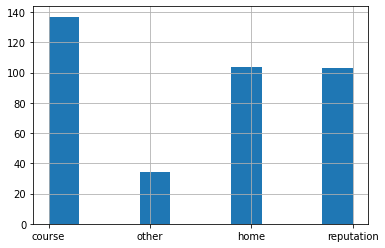

In [36]:
col_overview(stud.reason)

Промежуточные выводы:
1. Пропусков довольно много, удалять эти строки не хотелось бы. Но и заполнить пропуски не получится т.к. существует 4 варианта для заполнения.
2. Большинство выбирают школу из-за предоставляемой школой образовательной программы. 

## 10. Столбец 'guardian' -  опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Количество пропусков: 31,
count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object,
Распределение:
mother    250
father     86
other      28
Name: guardian, dtype: int64,


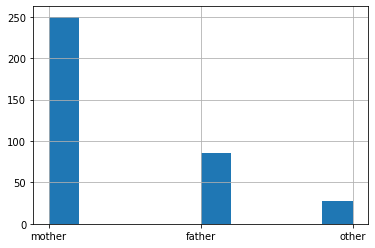

In [37]:
col_overview(stud.guardian)

Промежуточные выводы:
1. 29 пропусков, в большинстве случаев опекуном является мать.
2. Пропусков довольно много, удалять эти строки не хотелось бы. Но и заполнить пропуски не получится т.к. существует 3 варианта для заполнения.

## 11. Столбец 'traveltime' — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Количество пропусков: 28,
count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64,
Распределение:
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64,


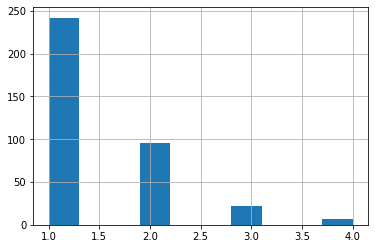

In [38]:
col_overview(stud.traveltime)

Промежуточные выводы:
1. 28 пропусков, в большинстве случаев учащиеся добираются до школы меньше чем за 15 минут.
2. Пропусков довольно много, удалять эти строки не хотелось бы. Но и заполнить пропуски не получится т.к. существует 4 варианта для заполнения.

## 12. Посмотрим теперь на столбцы 'studytime' и 'studytime_gr' вместе
1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

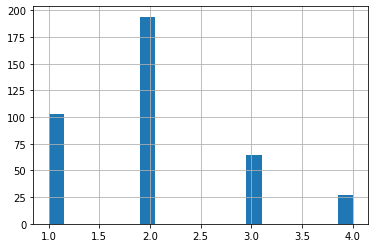

In [39]:
# Построим гистограмуу для 'studytime' и посмотрим как распределены данные
stud.studytime.hist(bins=20)
stud.studytime.describe()

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_gr, dtype: float64

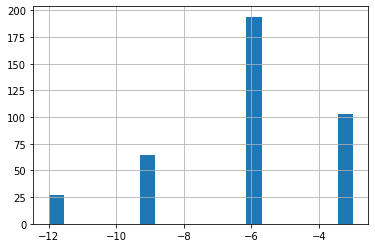

In [40]:
# Проделаем то же самое и со столбцом 'studytime_gr':
stud.studytime_gr.hist(bins=20)
stud.studytime_gr.describe()

Как видно из диаграмм, данные в столбцах имеют зеркальное к друг другу распределение. Если сравнить стастические показатели по параметрам, то можно заметить, что данные в 'studytime_gr' в '-3' раза больше чем данные 'studytime'. Скорее всего, данные в 'studytime_gr' являются дублирующими и их надо убрать из датасет. Но сначала посмотрим на коэффициент корреляции:

In [41]:
stud['studytime'].corr(stud['studytime_gr'])

-0.9999999999999991

Коэффициент корреляции равен '-1'. Мы можем убрать из датасета лишние данные:

In [42]:
stud.drop(['studytime_gr'], inplace=True, axis=1)

Промежуточные выводы:
1. В среднем ученики уделяют от 2 до 5 часов на доп.обучение 
2. Данные по времени на доп.обучение имеют пропуски. Удаление пропусков нежелательно, можно заменить на самое распространное значение

## 13. Failures - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

Количество пропусков: 22,
count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64,
Распределение:
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64,


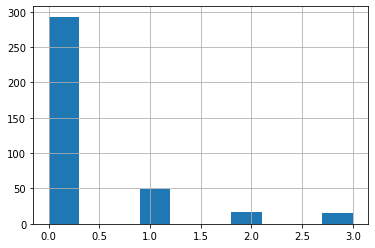

In [43]:
col_overview(stud.failures)

Промежуточные выводы:
1. в данных есть пропуски. 
2. у большинства не было внеучебных неудач. 
3. Пропуски возможно заменить на 0.

Количество пропусков: 0,
count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64,
Распределение:
0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64,


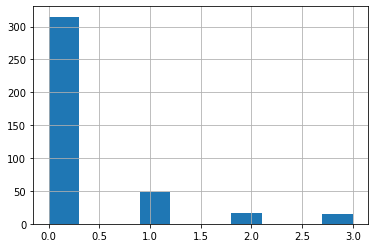

In [44]:
stud.failures = stud.failures.apply(
    lambda x: 0 if pd.isnull(x) else 0 if x == 'nan' else x)
col_overview(stud.failures)

## 14. Теперь посмотрим на все параметры, значения которых принимают 'yes' или 'no'

In [45]:
list_of_yes_no_columns = ['school_sup', 'fam_sup', 'paid', 'activities',
                          'nursery', 'higher', 'internet', 'romantic']

In [46]:
stud[list_of_yes_no_columns].describe()

,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic
count,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,2,2,2
top,no,yes,no,yes,yes,yes,yes,no
freq,335,219,200,195,300,356,305,240


In [47]:
# Для определения количетво пропусков по данным:
temp = stud[list_of_yes_no_columns].describe()
395-temp.T['count']

school_sup     9
fam_sup       39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
Name: count, dtype: object

Пропусков по school_sup только 9, поэтому можно попробовать заменить на часто встречающееся значение:

In [48]:
stud.school_sup = stud.school_sup.apply(
    lambda x: 'no' if pd.isnull(x) else 'no' if x == 'nan' else x)

Промежуточные выводы по параметрам:
Больше всего пропусков по параметру paid - 40 пропусков. Это параметр по дополнительным платным занятиям по математике.  Заполнить пропуски для всех параметров кроме  school_sup на данный момент не представляется возможным, так как значения внутри распределены без очевидных перекосов и выделить какое-то одно однозначно доминирующее невозможно.

## 15. famrel - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Количество пропусков: 27,
count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64,
Распределение:
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64,


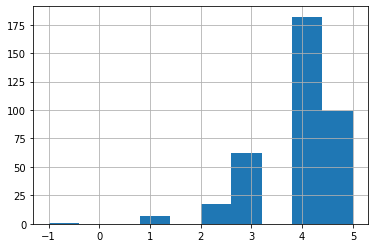

In [49]:
col_overview(stud.famrel)

В данных есть ошибка ввода: ввели минусовое значение. Предположим, что хотели ввести '1' вместо '-1'. Исправим ошибку:

In [50]:
stud['famrel'] = stud['famrel'].replace([-1.0], 1.0)

Количество пропусков: 27,
count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64,
Распределение:
4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64,


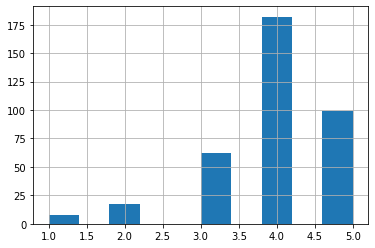

In [51]:
col_overview(stud.famrel)

Промежуточные выводы:
1. У большинства-хорошие семейные отношения.
2. Пропуски есть, но заменять их не можем, так как есть 5 вариантов выбора 

## 16. freetime - свободное время после школы (от 1 - очень мало до 5 - очень много)

Количество пропусков: 11,
count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64,
Распределение:
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64,


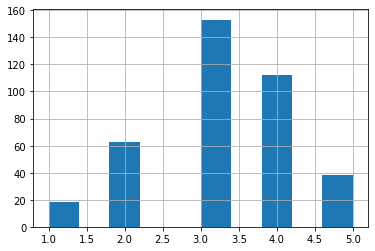

In [52]:
col_overview(stud.freetime)

Промежуточные выводы:
1. У большинства-много свободного времени.
2. Пропуски есть, но заменять их не можем, так как есть 5 вариантов выбора 

## 17. go_out - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Количество пропусков: 8,
count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64,
Распределение:
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64,


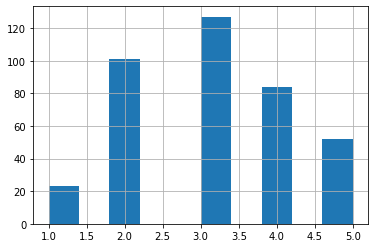

In [53]:
col_overview(stud.go_out)

Промежуточные выводы:
1. Распределение - больше подходит на нормальное распределение.
2. Пропуски есть, но заменять их не можем, так как есть 5 вариантов выбора 

## 18. health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Количество пропусков: 15,
count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64,
Распределение:
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64,


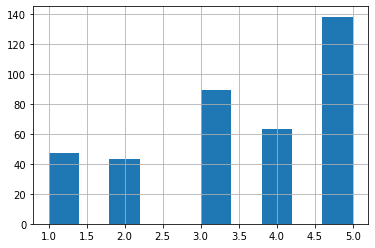

In [54]:
col_overview(stud.health)

Промежуточные выводы:
1. У большинства- хорошее состояние здоровья.
2. Пропуски есть, но заменять их не можем, так как есть 5 вариантов выбора 

## 19. absences - количество пропущенных занятий

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

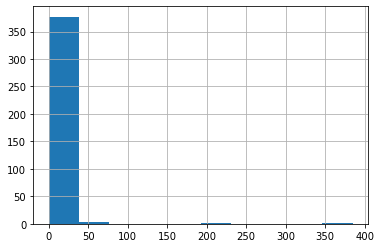

In [55]:
stud['absences'].hist(bins=10)
stud['absences'].describe()

В среднем пропускают 4 занятия. В данных есть явные выбросы:

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


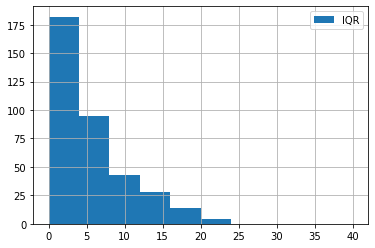

In [56]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10, range=(0, 40), label='IQR')
plt.legend()

In [57]:
# Удалим выбросы:
stud.loc[stud['absences'] > 20, 'absences'] = np.nan

In [58]:
stud['absences'].describe()

count    366.000000
mean       4.603825
std        4.965512
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

## 20. Score - баллы по госэкзамену по математике

Количество пропусков: 6,
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64,
Распределение:
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64,


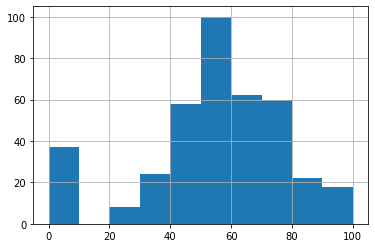

In [59]:
col_overview(stud.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


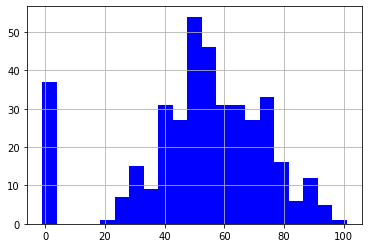

In [60]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.score.loc[stud.score <= 101].hist(bins=21,
                                       range=(-1, 101),
                                       color='red',
                                       label='выбросы')

stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=21,
                                                                            range=(-1,
                                                                                   101),
                                                                            color='blue',
                                                                            label='IQR')

Средняя оценка - 55 баллов, минимальная оценка - О, максимальная- 100. Оценку в 0 баллов из данных убирать нельзя, так как не совсем ясно причина появления - либо это реальные результаты, или ошибка ввода, либо показатель отсутствия ученика. 

# Корреляционный анализ

Выясним, какие столбцы коррелируют с score. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

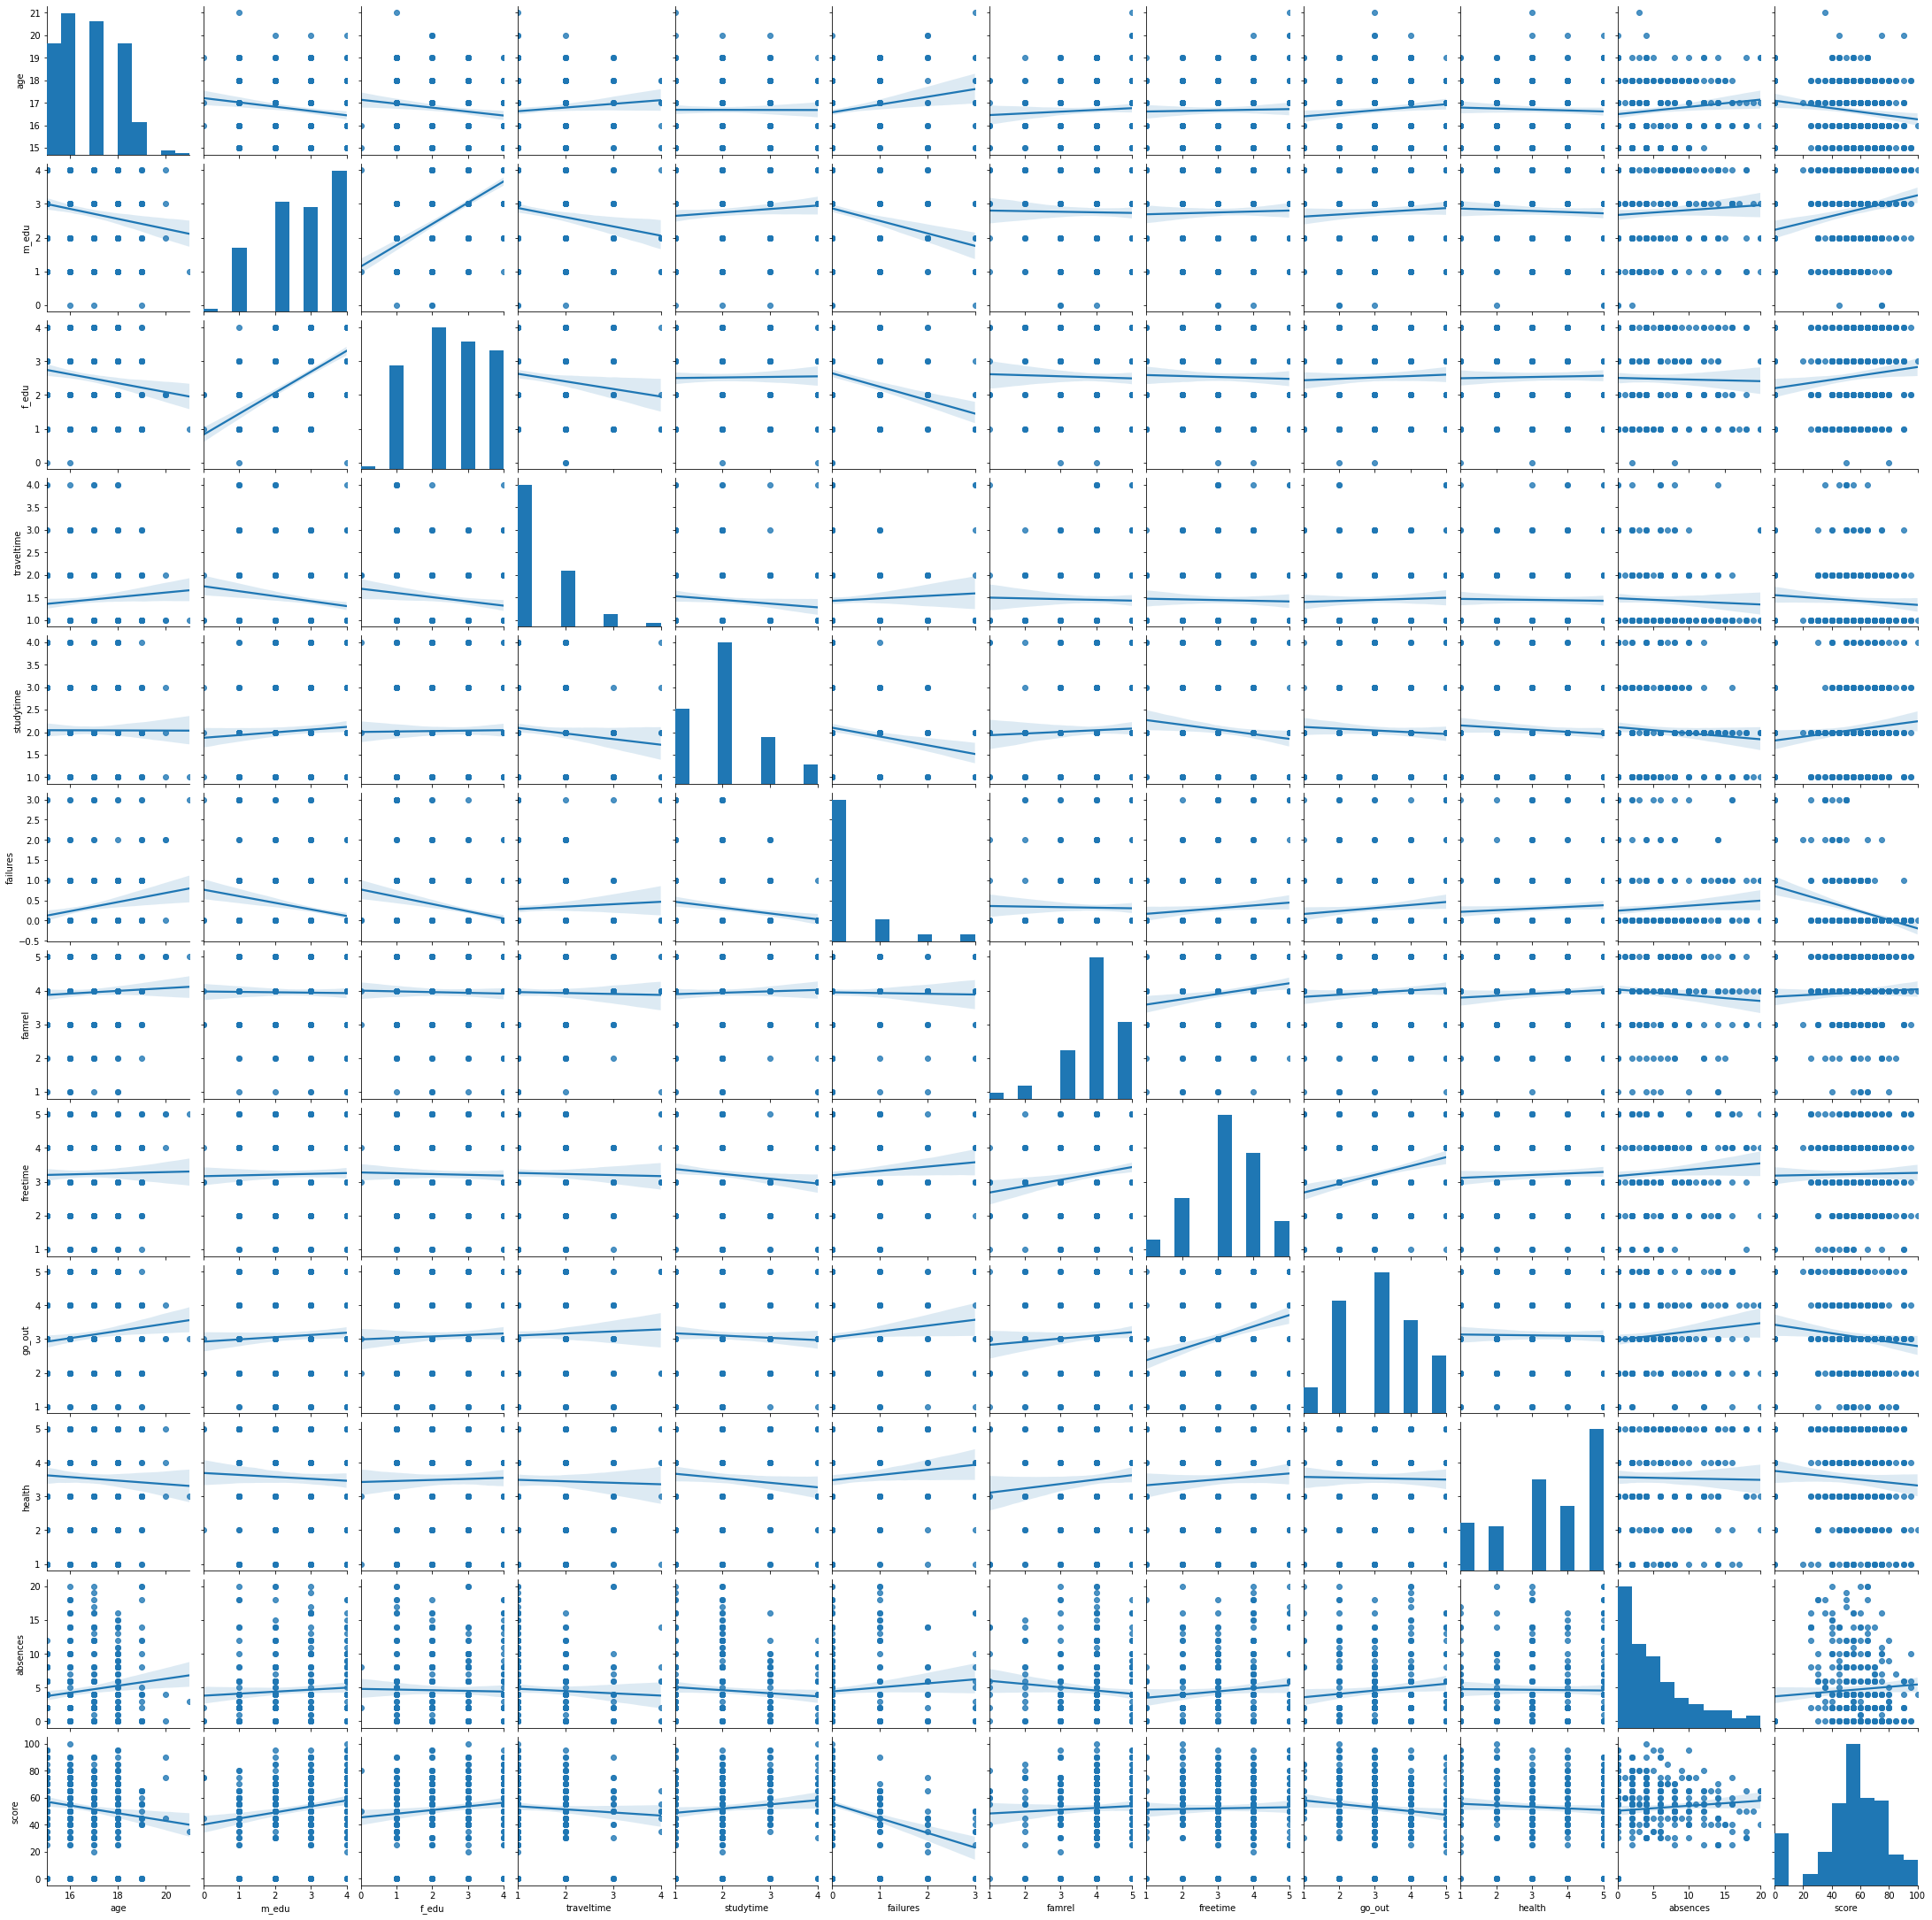

In [61]:
sns.pairplot(stud, kind='reg')

In [62]:
stud.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,go_out,health,absences,score
age,1.000000,-0.167883,-0.152024,0.090864,-0.002354,0.196777,0.055561,0.021067,0.119997,-0.047402,0.129016,-0.153518
m_edu,-0.167883,1.000000,0.625516,-0.173515,0.078589,-0.245587,-0.014459,0.025335,0.064164,-0.045051,0.065712,0.213349
f_edu,-0.152024,0.625516,1.000000,-0.145349,0.012896,-0.267978,-0.026122,-0.025892,0.042663,0.023862,-0.021811,0.130923
traveltime,0.090864,-0.173515,-0.145349,1.000000,-0.102206,0.057488,-0.021542,-0.021937,0.037636,-0.021531,-0.047995,-0.070559
studytime,-0.002354,0.078589,0.012896,-0.102206,1.000000,-0.168020,0.039555,-0.121969,-0.051280,-0.080016,-0.078099,0.115741
failures,0.196777,-0.245587,-0.267978,0.057488,-0.168020,1.000000,-0.017503,0.094530,0.113897,0.078668,0.086239,-0.337187
famrel,0.055561,-0.014459,-0.026122,-0.021542,0.039555,-0.017503,1.000000,0.172751,0.077167,0.086309,-0.090500,0.055305
freetime,0.021067,0.025335,-0.025892,-0.021937,-0.121969,0.094530,0.172751,1.000000,0.296437,0.061575,0.093436,0.019026
go_out,0.119997,0.064164,0.042663,0.037636,-0.051280,0.113897,0.077167,0.296437,1.000000,-0.015608,0.111587,-0.129685
health,-0.047402,-0.045051,0.023862,-0.021531,-0.080016,0.078668,0.086309,0.061575,-0.015608,1.000000,-0.014358,-0.070460


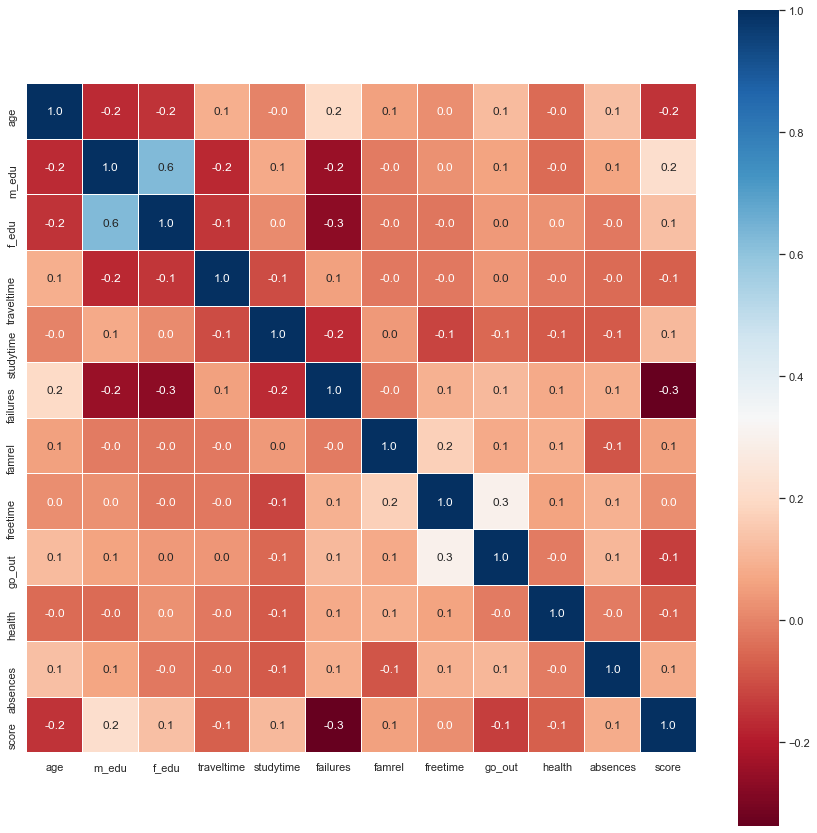

In [63]:
# Для большей наглядности построим heatmap
sns.set(font_scale=1)
plt.subplots(figsize=(15, 15))
sns.heatmap(stud.corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Относительно высокая корреляция наблюдается только по показателям образования родителей.

Посмотрим на корреляцию с целевым признаком score и попробуем сделать некоторые выводы

In [72]:
stud.corr().score

age          -0.153518
m_edu         0.213349
f_edu         0.130923
traveltime   -0.070559
studytime     0.115741
failures     -0.337187
famrel        0.055305
freetime      0.019026
go_out       -0.129685
health       -0.070460
absences      0.081274
score         1.000000
Name: score, dtype: float64

1. Максимальное абсолютное значение коэффициента корреляции равен 0.33, по параметру failures (количество внеучебных неудач). Коээфициент корреляции имеет отрицательный знак, а это значит что чем больше у студента внеучебных неудач, тем ниже может быть его оценка по экзамену. Этот параметр должен быть включен в модель.
2. Самое незначительное значение коэффициента корряляции показал параметр freetime (свободное время после школы), примерно -0.02, что свидетельствует о том, что зависимость между оценкой по экзамену и свободным временем после школы очень мала. Можно исключить параметр из модели.
3. Образование матери больше влияет на балл по экзамену по сравнению с образованием отца.
4. Параметры age, traveltime, go_out, health имеют отрицательный коэффициент. Чем больше возраст у ученика, время пути до школы, проведенное с друзьями, а также чем лучше текущее состояние здоровья, тем ниже оценка по экзамену. Но степень корреляции по этим показателям небольшая.
5. Параметры m_edu, f_edu, studytime, famrel имеют положительный коэффициент. Чем лучше образование родителей, чем больше ученик тратит на обучение вне школы и хорошие семейные отношения тем лучше оценка по экзамену. Но степень корреляции по этим показателям небольшая.
6. Параметр absences (кол-во пропущенных занятий) также показал положительную корреляцию, но значение можно считать незначительным. 

Для дальнейшего построения модели нужно выбрать наиболее значимые параметры: age, m_edu, f_edu, studytime, failures, goout.



# Анализ номинативных переменных

Для анализа номинативных переменных будет использовать box-plot. С помощью этой функции мы построим графики плотности распределения переменных, и таким образом мы сможем визуально оценить/сравнить значения признаков и их влияние на целевую переменную score.

In [65]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

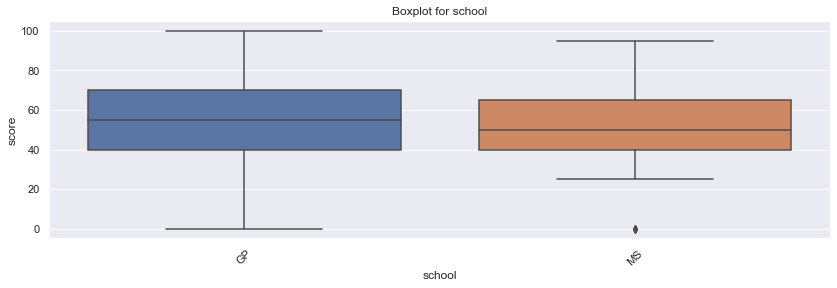

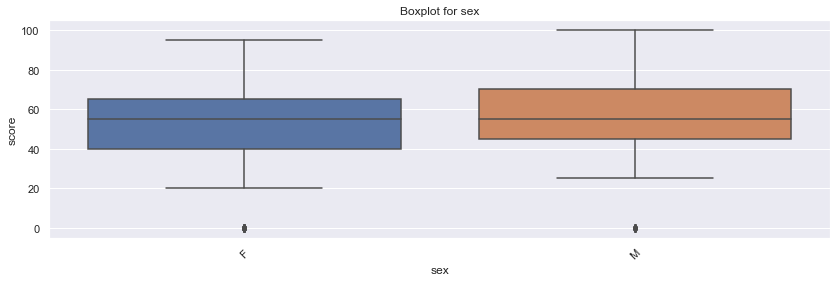

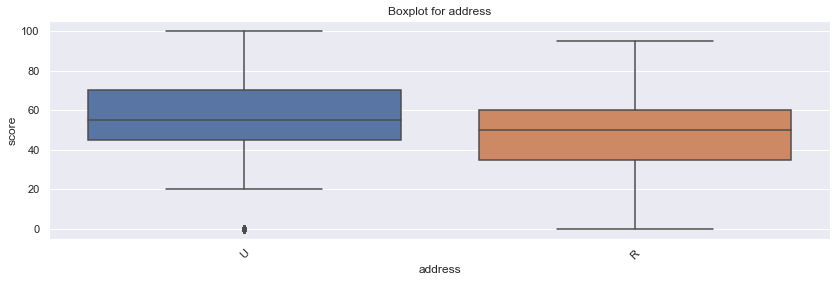

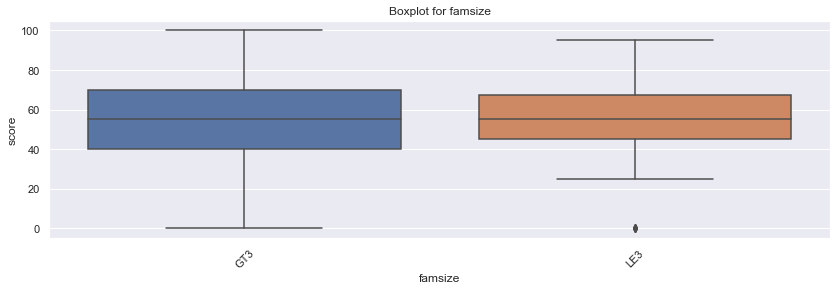

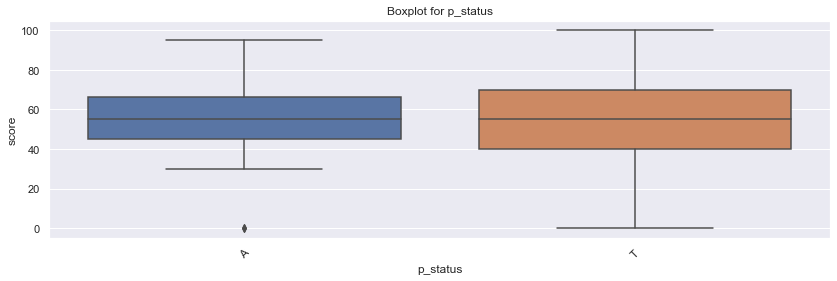

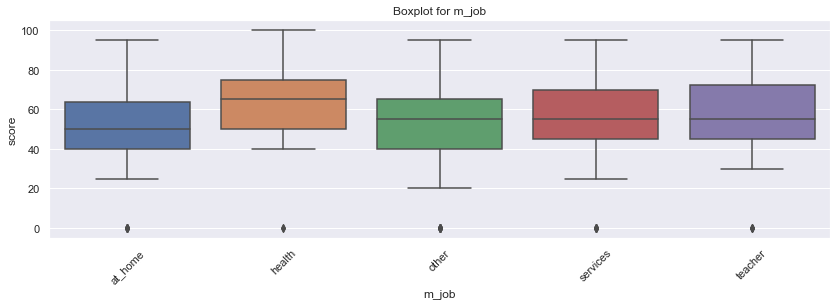

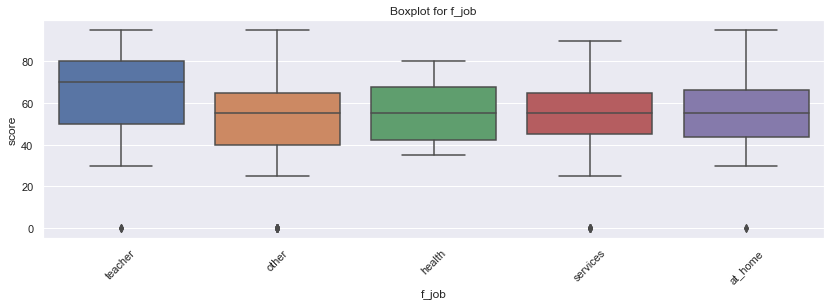

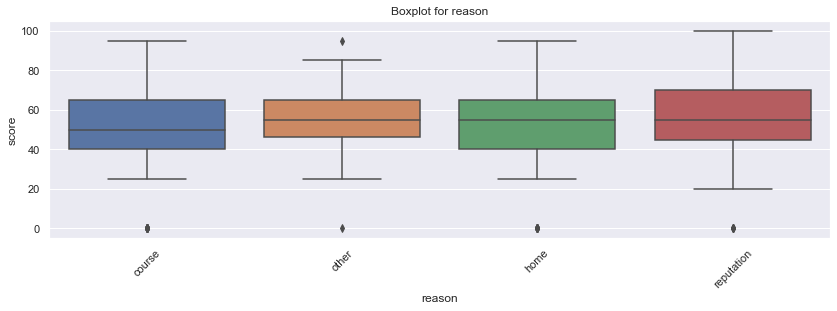

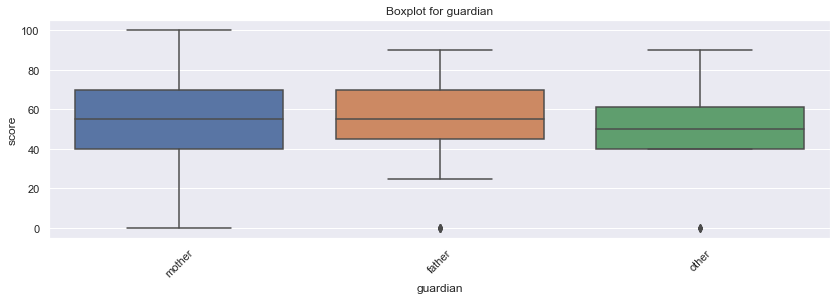

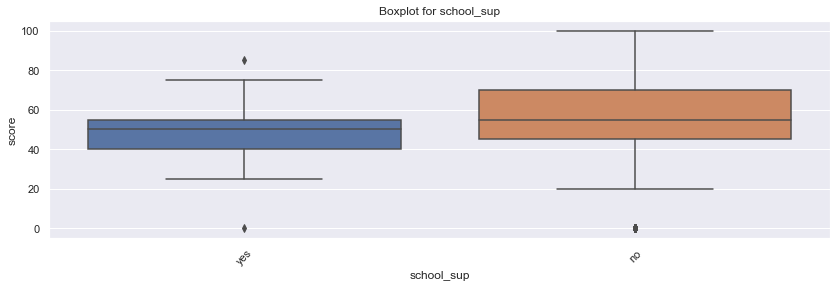

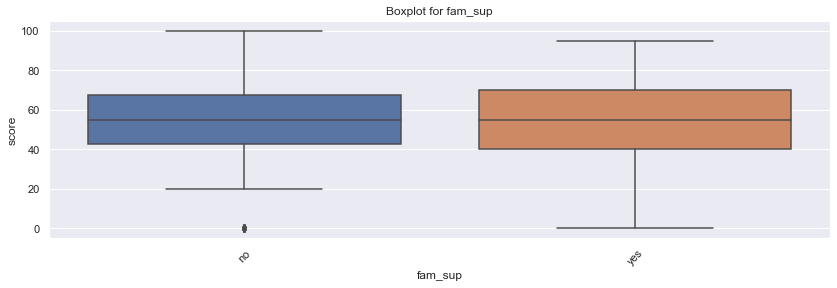

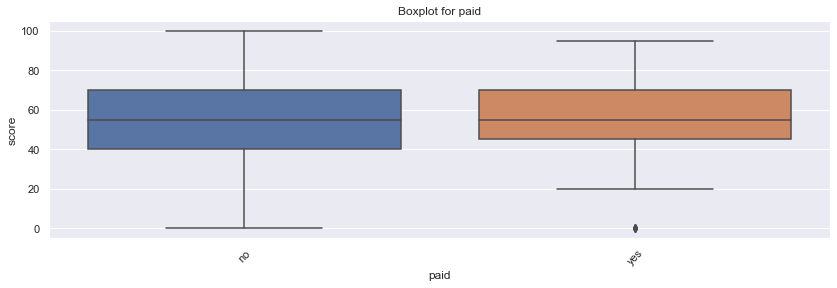

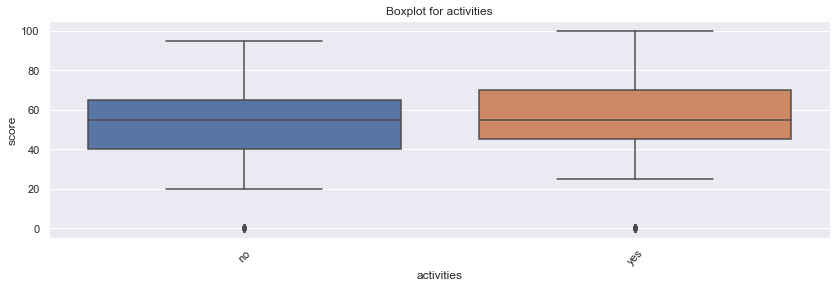

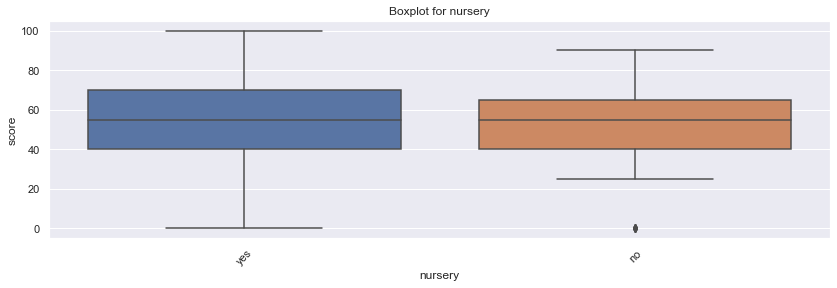

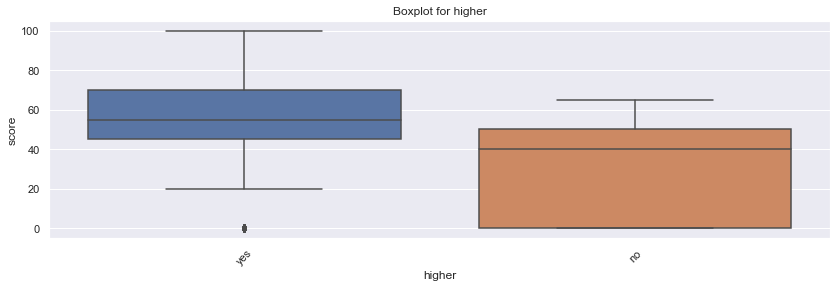

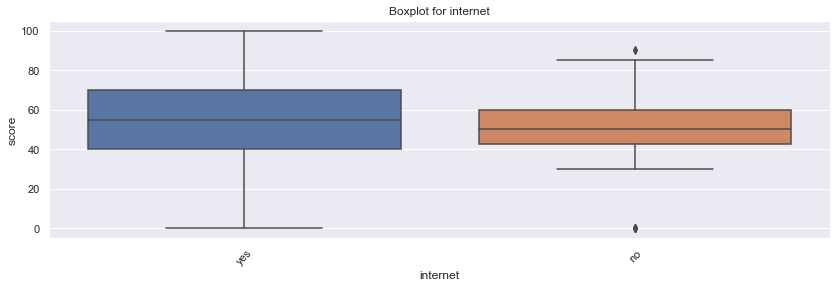

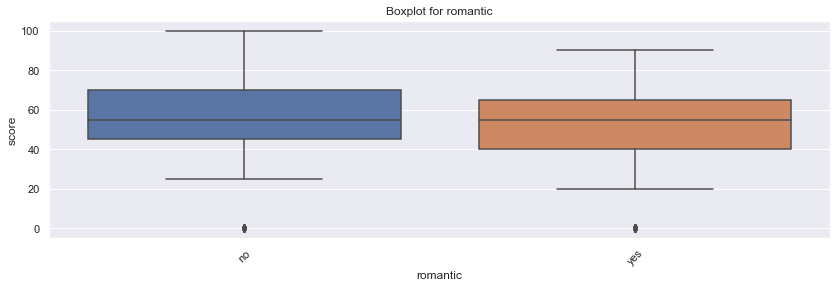

In [66]:
for col in ['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup',
            'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Общие выводы, которые можно сделать при рассмотрении графиков.

все признаки вносят вклад в итоговый балл по экзамену, хоть и некоторые совсем незначительный.
результаты экзаменов лучше:
* у учеников школы GP
* у учеников мужского пола 
* у учеников, живущих в городе
* у учеников, чья мать работает в сфере здравоохранения
* у учеников, чей отец работает учителем
* у учеников, у которых репутация школы стоит на первом месте при выборе школы
* у учеников с опекуном матерью и опекуном отцом
* у учеников без дополнительной образовательной поддержки (наверное, связано с тем что более сильным ученикам она не требуется)
* у учеников с дополнительными платными заянятиями по математике
* у учеников с дополнительными внеучебными занятиями
* у учеников, посещавших дет. сад
* у учеников, планирующих получать высшее образование
* учеников, у которых дома есть интернет
* у учеников, не находящихся в романтических отношениях

признаки, которые практически не вносят вклад в конечную оценку: famsize, p_status, fam_sup

# Выводы:

В результате EDA для анализа влияния параметров ученика на экзамен по математике были получены следующие выводы:

1. В данных достаточно много пустых значений, практически каждый признак содержит значительное количество пропусков.
2. Явных выбросов и ошибок в данных мало, что позволяет сделать вывод о том, что данные достаточно чистые.
3. Положительная корреляция параметра age и score может говорить о том, что с годами ученики хуже сдают экзамен по математике, однака эта корреляция может быть ложной.
4. Целевая переменная score имеет большое количество нулевых значений, что может судить о прогуле или удаления ученика с экзамена.
5. В данной выборке мальчики лучше сдали экзамены чем девочки.
6. Анализ переменных показывает, что на оценки положительно влияют: проживание в городе, образование родителей и место работы матери, хочет ли ученик получить высшее образование или нет, есть ли дома интернет; отрицательно - дополнительная образовательная поддержка, неудачи и прогулы, что вполне логично.
7. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели: age, sex, address, m_edu, f_edu, mjob, failures, schoolsup, higher, internet.